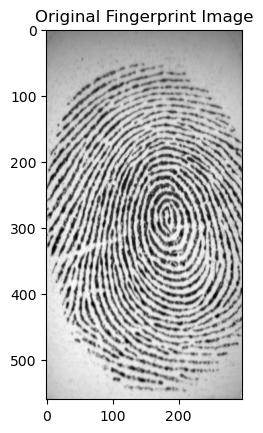

In [6]:
# 지문 이미지 출력

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('DB2_B/101_1.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('Original Fingerprint Image')
plt.show()

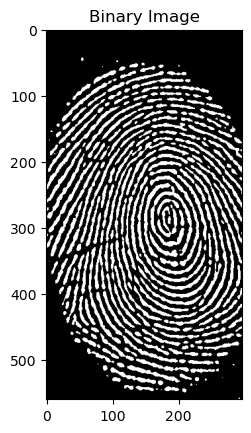

In [7]:
# 이진화

blur = cv2.GaussianBlur(img, (5, 5), 0)
binary = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 10)

plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.show()

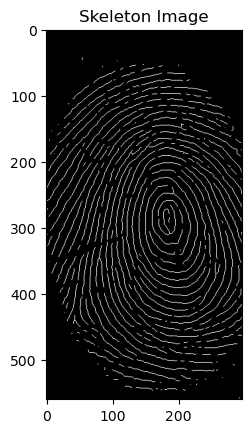

In [8]:
# 골격화

from skimage.morphology import skeletonize

skeleton = skeletonize(binary // 255)

plt.imshow(skeleton, cmap='gray')
plt.title('Skeleton Image')
plt.show()

탐지 : 572개의 특징점


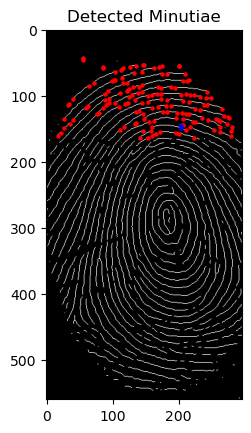

In [9]:
# 특징 점 추출

import numpy as np

def extract_minutiae(skeleton):
    h, w = skeleton.shape
    points = []
    for y in range(1, h-1):
        for x in range(1, w-1):
            if skeleton[y, x]:  # 흰색 픽셀 (1)
                n = np.sum(skeleton[y-1:y+2, x-1:x+2]) - 1  # 주변 8방향 흰색 픽셀 수
                if n == 1:
                    points.append((x, y, 'ending'))  # 단말점
                elif n == 3:
                    points.append((x, y, 'bifurcation'))  # 분기점
    return points

features = extract_minutiae(skeleton)
print(f"탐지 : {len(features)}개의 특징점")

plt.imshow(skeleton, cmap='gray')
for x, y, t in features[:150]:
    color = 'r' if t == 'ending' else 'b'
    plt.scatter(x,y,c = color, s=5)
plt.title('Detected Minutiae')
plt.show()

In [11]:
# 지문 비교

import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.morphology import skeletonize
from scipy.spatial.distance import cdist

def extract_minutiae(skeleton):
    h, w = skeleton.shape
    points = []
    for y in range(1, h-1):
        for x in range(1, w-1):
            if skeleton[y, x]:  # 흰색 픽셀 (1)
                n = np.sum(skeleton[y-1:y+2, x-1:x+2]) - 1  # 주변 8방향 흰색 픽셀 수
                if n == 1:
                    points.append((x, y, 'ending'))  # 단말점
                elif n == 3:
                    points.append((x, y, 'bifurcation'))  # 분기점
    return points

def match_score(f1, f2):
    A = np.array([(x, y) for x, y, t in f1])
    B = np.array([(x, y) for x, y, t in f2])
    dist = cdist(A, B)

    return np.mean(np.min(dist, axis=1))

img = cv2.imread('DB2_B/101_1.tif', cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(img, (5, 5), 0)
binary = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 10)

skeleton = skeletonize(binary // 255)
features = extract_minutiae(skeleton)

img2 = cv2.imread('DB2_B/101_2.tif', cv2.IMREAD_GRAYSCALE)
blur2 = cv2.GaussianBlur(img2, (5, 5), 0)
binary2 = cv2.adaptiveThreshold(blur2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 10)

skeleton2 = skeletonize(binary2 // 255)
f2 = extract_minutiae(skeleton2)

print(match_score(features, f2))

11.610673696888542


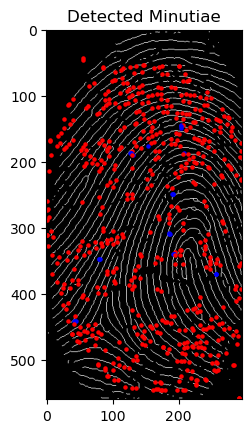

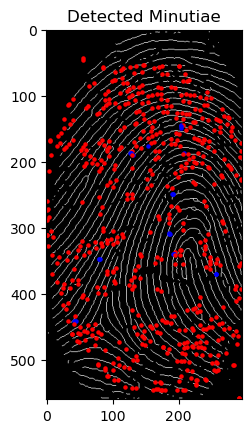

Match score (낮을 수록 유사한 이미지): 8.388848873920074


In [10]:
# 비교 할 이미지 경로 설정
f1_path = 'DB2_B/101_1.tif'
f2_path = 'DB2_B/102_1.tif'

import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.morphology import skeletonize
from scipy.spatial.distance import cdist

def extract_minutiae(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # 이미지 불러오기
    blur = cv2.GaussianBlur(img, (5, 5), 0) # 가우시안 블러
    binary = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 10) # 이진화
    skeleton = skeletonize(binary // 255) # 골격화

    h, w = skeleton.shape
    points = []
    for y in range(1, h-1):
        for x in range(1, w-1):
            if skeleton[y, x]:
                n = np.sum(skeleton[y-1:y+2, x-1:x+2]) - 1
                if n == 1:
                    points.append((x, y, 'ending'))
                elif n == 3:
                    points.append((x, y, 'bifurcation'))

    return skeleton, points

def match_score(f1, f2):
    A = np.array([(x, y) for x, y, t in f1])
    B = np.array([(x, y) for x, y, t in f2])
    dist = cdist(A, B)

    return np.mean(np.min(dist, axis=1))

s1, f1 = extract_minutiae(f1_path)
s2, f2 = extract_minutiae(f2_path)

for s in [s1, s2]:
    plt.imshow(i, cmap='gray')
    for x, y, t in f1:
        color = 'r' if t == 'ending' else 'b'
        plt.scatter(x,y,c = color, s=5)
    plt.title(f'Detected Minutiae')
    plt.show()

print(f"Match score (낮을 수록 유사한 이미지): {match_score(f1, f2)}")

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.morphology import skeletonize
from scipy.spatial.distance import cdist

def extract_minutiae(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # 이미지 불러오기
    blur = cv2.GaussianBlur(img, (5, 5), 0) # 가우시안 블러
    binary = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 10) # 이진화
    skeleton = skeletonize(binary // 255) # 골격화

    h, w = skeleton.shape
    points = []
    for y in range(1, h-1):
        for x in range(1, w-1):
            if skeleton[y, x]:  # 흰색 픽셀 (1)
                n = np.sum(skeleton[y-1:y+2, x-1:x+2]) - 1  # 주변 8방향 흰색 픽셀 수
                if n == 1:
                    points.append((x, y, 'ending'))  # 단말점
                elif n == 3:
                    points.append((x, y, 'bifurcation'))  # 분기점

    return points

def match_score(f1, f2):
    A = np.array([(x, y) for x, y, t in f1])
    B = np.array([(x, y) for x, y, t in f2])
    dist = cdist(A, B)

    return np.mean(np.min(dist, axis=1))

# 1번 사람과 나머지 비교해보기
curr = 1
result = []

for i in range(1, 9):
    f1_path = f'DB2_B/1{curr:02d}_{i}.tif'

    for j in range(2, 11):
        f2_path = f'DB2_B/1{j:02d}_{i}.tif'

        f1 = extract_minutiae(f1_path)
        f2 = extract_minutiae(f2_path)

        score = match_score(f1, f2)
        print(f"Match score {score}")
        result.append((f1_path, f2_path, score))

print(result)

Match score 8.388848873920074
Match score 12.785952452736023
Match score 14.578614135485957
Match score 14.212979407547756
Match score 9.41660651963647
Match score 5.4736200386246265
Match score 8.391114746228384
Match score 8.13755661051136
Match score 10.549254406159202
Match score 12.716875428287603
Match score 13.8601726340079
Match score 15.284215746127218
Match score 18.897237380759027
Match score 12.53328948735863
Match score 6.716480069392782
Match score 9.83661000293653
Match score 14.222220862473772
Match score 15.839413258022017
Match score 7.585014730538403
Match score 11.371039976964873
Match score 11.579759609440213
Match score 21.695858770486286
Match score 12.939594770348606
Match score 7.01416795378665
Match score 10.090663820475998
Match score 18.69419001956418
Match score 12.726643579299932
Match score 11.004133695718183
Match score 12.087228464906694
Match score 15.910617793333046
Match score 12.231456460995409
Match score 7.421506600464569
Match score 8.48411444034